# Project notebook **<span style="COLOR:RED"></span>**


### Student 1 (first half presentation)
Name : Darren Xiao Li Wan
<br>Group : advanced
### Student 2 (second half presentation)
Name : Maher Abou Jaoude
<br>Group : advanced
### Data name : Kobe Bryant Shot Chart

### Data URL : http://stats.nba.com/stats/shotchartdetail?ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&Period=0&PlayerID=977&PlayerPosition=&Position=&Season=2005-06&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&RookieYear=

### Short summary of the project and datasource :
<span style="COLOR:RED">Should be a few lines maximum</span>

## Aims : 
** <span style="color:red"> Here explain what you what to do with data</span> ** 
* 
* 
* 

In [1]:
%matplotlib inline
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import re
import sklearn
from sklearn import model_selection
import scipy.stats as stats

import os
import json

## Download : 
** <span style="color:red">Write explanations here</span> ** 
* We load the .json data directly from the ShotChartDetail endpoint of stats.nba.com
* If connection times out, the .json files are hosted on github
* The defined function allows us to get custom player data (using player id and season range)

In [2]:
def getShotChartDetail(p, startYear, endYear):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    df_list_player=[]
    df_list_avg=[]
    for i in range(startYear, endYear+1):
        s=str(i-1)+'-'+str(i)[-2:]
        url="https://stats.nba.com/stats/shotchartdetail?ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&Period=0&PlayerID={0}&PlayerPosition=&Position=&Season={1}&SeasonSegment=&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&RookieYear=".format(p, s)
        response=requests.get(url, headers=headers)
        data=json.loads(response.text)
        tmpplayer=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
        tmpplayer["SEASON"], tmpavg["SEASON"] = [i,i]
        df_list_player.append(tmpplayer)
        df_list_avg.append(tmpavg)
    return([pd.concat(df_list_player),pd.concat(df_list_avg)])

In [3]:
def getShotChartDetailGithub(startYear, endYear):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
    df_list_player=[]
    df_list_avg=[]
    for i in range(startYear, endYear+1):
        s=str(i-1)+'-'+str(i)[-2:] 
        url="https://raw.githubusercontent.com/MAP536/PythonProject/master/json/kobe{}.json".format(i)
        response=requests.get(url, headers=headers)
        data=json.loads(response.text)
        tmpplayer=pd.DataFrame(data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
        tmpavg=pd.DataFrame(data['resultSets'][1]['rowSet'], columns=data['resultSets'][1]['headers'])
        tmpplayer["SEASON"], tmpavg["SEASON"] = [i,i]
        df_list_player.append(tmpplayer)
        df_list_avg.append(tmpavg)
    return([pd.concat(df_list_player),pd.concat(df_list_avg)])

In [3]:
kobe, avg=getShotChartDetail(201566,2009,2018)
kobe.shape

(13009, 25)

** <span style="color:red">If there is any obvious data curation to be performed upon initial data loading, do it here</span> ** 



In [5]:
pd.set_option("display.max_columns", None)
kobe


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON
0,Shot Chart Detail,0029600027,102,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,42,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-140,116,1,0,19961103,LAL,MIN,1997
1,Shot Chart Detail,0029600031,127,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,10,8,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-131,97,1,0,19961105,NYK,LAL,1997
2,Shot Chart Detail,0029600044,124,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,8,37,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-142,181,1,1,19961106,CHH,LAL,1997
3,Shot Chart Detail,0029600044,144,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,6,34,Missed Shot,Jump Shot,3PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,0,19961106,CHH,LAL,1997
4,Shot Chart Detail,0029600044,151,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,5,27,Made Shot,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,13,-10,138,1,1,19961106,CHH,LAL,1997
5,Shot Chart Detail,0029600057,157,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,7,18,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,19,75,177,1,0,19961108,TOR,LAL,1997
6,Shot Chart Detail,0029600057,226,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,2,16,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Center(C),16-24 ft.,23,-64,223,1,1,19961108,TOR,LAL,1997
7,Shot Chart Detail,0029600057,321,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,3,25,Made Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,0,1,1,19961108,TOR,LAL,1997
8,Shot Chart Detail,0029600057,334,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,53,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,19,-79,177,1,0,19961108,TOR,LAL,1997
9,Shot Chart Detail,0029600057,337,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,14,Made Shot,Jump Shot,3PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,23,-103,207,1,1,19961108,TOR,LAL,1997


## Data charaterisctics :
** <span style="color:red"> Write explanations here</span> ** 
* Identifying data and datatypes
* Ceaning up data
* Analyzing outliers
* Manupilating dataframe for our model later

In [4]:
df_kobe=kobe.copy()

# Split into integer and categorical columns
intcol,objcol=[],[]
for i in df_kobe.columns:
    print(i, ": ", df_kobe[i].dtype.name)
    intcol.append(i) if df_kobe[i].dtype.name=='int64' else objcol.append(i)

GRID_TYPE :  object
GAME_ID :  object
GAME_EVENT_ID :  int64
PLAYER_ID :  int64
PLAYER_NAME :  object
TEAM_ID :  int64
TEAM_NAME :  object
PERIOD :  int64
MINUTES_REMAINING :  int64
SECONDS_REMAINING :  int64
EVENT_TYPE :  object
ACTION_TYPE :  object
SHOT_TYPE :  object
SHOT_ZONE_BASIC :  object
SHOT_ZONE_AREA :  object
SHOT_ZONE_RANGE :  object
SHOT_DISTANCE :  int64
LOC_X :  int64
LOC_Y :  int64
SHOT_ATTEMPTED_FLAG :  int64
SHOT_MADE_FLAG :  int64
GAME_DATE :  object
HTM :  object
VTM :  object
SEASON :  int64


### Categorical data
* Analyzing Categorical Variables
* Creating or deleting Categorical Variables

In [7]:
# Check the rate of categorical entries
for i in objcol:
    print("{0}: \n{1}\n".format(i,df_kobe[i].value_counts()))

GRID_TYPE: 
Shot Chart Detail    26198
Name: GRID_TYPE, dtype: int64

GAME_ID: 
0021501228    50
0020200069    47
0020500591    46
0020600431    45
0020700553    44
0020601081    44
0021200398    41
0020500480    41
0020200743    41
0020200127    40
0020500988    39
0020600977    39
0020800884    38
0020501078    38
0020600340    38
0020200769    38
0020200142    37
0020900527    37
0020601016    37
0021400056    37
0020701082    37
0020500412    37
0020500192    36
0020500114    36
0020200223    35
0020200372    35
0020500130    35
0020500563    35
0020600994    35
0020000267    35
              ..
0020001059     4
0021200971     4
0029701022     4
0029601162     4
0029600698     4
0029600044     3
0029600991     3
0029600488     3
0029600072     3
0029600362     3
0029600432     3
0029600727     3
0020400518     2
0029600095     2
0029600219     2
0029600382     2
0029600086     2
0029600844     2
0021500906     2
0029600136     2
0029600781     2
0029600813     1
0029600412     1
00

In [5]:
df=df_kobe.copy()

# Add opponents
df['OPP']=np.where(df.HTM=='LAL', df.VTM, df.HTM)

# Aggregate shot types
shot_labels={"Dunk":"Dunk Shot","Layup|Finger":"Layup Shot","Hook":"Hook Shot","Jump|Bank|Fadeaway":"Jump Shot","Tip":"Tip Shot"}
df["ACTION_TYPE2"]=df.ACTION_TYPE
for k, v in shot_labels.items():
    df.loc[df.ACTION_TYPE.str.contains(k),"ACTION_TYPE"] = v
    
# Format date
df['GAME_DATE']=df.GAME_DATE.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))

# Check if event_flag same as shot_made_flag
df.SHOT_MADE_FLAG.eq(df.EVENT_TYPE.replace("Missed Shot",0).replace("Made Shot",1)).value_counts()

# Create CLUTCH_SHOT column
CLUTCH_SHOT = (df.PERIOD >= 4) & (df.MINUTES_REMAINING <= 5)
df['CLUTCH_SHOT'] = CLUTCH_SHOT.astype('uint8')

# Transform details of actiontype into indicator variables
df['ACTION_TYPE2']=list(map(lambda x: re.sub('Jump|Layup|Dunk|Hook|Tip|Shot|-','',x, flags=re.IGNORECASE).strip(),df.ACTION_TYPE2))
for i in ['Finger Roll','Step Back','Alley Oop','Follow Up']:
    df['ACTION_TYPE2']=list(map(lambda x: re.sub(i,i.replace(' ',''),x),df['ACTION_TYPE2']))
    
# Remove empty
action_detail=list(set(filter(None, df.ACTION_TYPE2)))
action_detail=list(set(' '.join(action_detail).upper().split(' ')))

df['ACTION_TYPE2']=df.ACTION_TYPE2.str.upper()
for i in action_detail:
    df[i]=np.where(df.ACTION_TYPE2.str.contains(i),1,0)
df=df.drop('ACTION_TYPE2',axis=1)

#clean shot_zone_area
df['SHOT_ZONE_AREA']=df.SHOT_ZONE_AREA.apply(lambda x: re.sub('\(\S*\)','',x))
df['SHOT_ZONE_AREA']=df.SHOT_ZONE_AREA.apply(lambda x: re.sub(' ','_',x))

#shot_type
df['SHOT_TYPE']=np.where(df.SHOT_TYPE=='2PT Field Goal',0,1)
df=df.rename(index=str, columns={"SHOT_TYPE": "THREE_POINT_SHOT"})

In [9]:
df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,THREE_POINT_SHOT,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SEASON,OPP,CLUTCH_SHOT,PULLUP,FINGERROLL,RUNNING,REVERSE,FOLLOWUP,SLAM,CUTTING,DRIVING,BANK,STEPBACK,PUTBACK,FLOATING,FADEAWAY,ALLEYOOP,TURNAROUND
0,Shot Chart Detail,0029600027,102,977,Kobe Bryant,1610612747,Los Angeles Lakers,1,0,42,Missed Shot,Jump Shot,0,Mid-Range,Left_Side_Center,16-24 ft.,18,-140,116,1,0,1996-11-03,LAL,MIN,1997,MIN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Shot Chart Detail,0029600031,127,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,10,8,Missed Shot,Jump Shot,0,Mid-Range,Left_Side_Center,16-24 ft.,16,-131,97,1,0,1996-11-05,NYK,LAL,1997,NYK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Shot Chart Detail,0029600044,124,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,8,37,Made Shot,Jump Shot,1,Mid-Range,Left_Side_Center,16-24 ft.,23,-142,181,1,1,1996-11-06,CHH,LAL,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Shot Chart Detail,0029600044,144,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,6,34,Missed Shot,Jump Shot,1,Restricted Area,Center,Less Than 8 ft.,0,0,0,1,0,1996-11-06,CHH,LAL,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Shot Chart Detail,0029600044,151,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,5,27,Made Shot,Jump Shot,0,In The Paint (Non-RA),Center,8-16 ft.,13,-10,138,1,1,1996-11-06,CHH,LAL,1997,CHH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Shot Chart Detail,0029600057,157,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,7,18,Missed Shot,Jump Shot,0,Mid-Range,Right_Side_Center,16-24 ft.,19,75,177,1,0,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Shot Chart Detail,0029600057,226,977,Kobe Bryant,1610612747,Los Angeles Lakers,2,2,16,Made Shot,Jump Shot,1,Mid-Range,Center,16-24 ft.,23,-64,223,1,1,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Shot Chart Detail,0029600057,321,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,3,25,Made Shot,Layup Shot,0,Restricted Area,Center,Less Than 8 ft.,0,0,0,1,1,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Shot Chart Detail,0029600057,334,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,53,Missed Shot,Jump Shot,0,Mid-Range,Left_Side_Center,16-24 ft.,19,-79,177,1,0,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Shot Chart Detail,0029600057,337,977,Kobe Bryant,1610612747,Los Angeles Lakers,3,1,14,Made Shot,Jump Shot,1,Mid-Range,Left_Side_Center,16-24 ft.,23,-103,207,1,1,1996-11-08,TOR,LAL,1997,TOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Drop unnecessary categorical columns
## GRID_TYPE,PLAYER_NAME,TEAM_NAME,EVENT_TYPE contain only one value each
## GAME_ID~GAME_DATE, VTM~OPP,HTM, SHOT_ZONE_BASIC/SHOT_ZONE_RANGE~LOC_X/LOC_Y
df['SECONDS_REMAINING']=df.SECONDS_REMAINING+df.MINUTES_REMAINING*60
df=df.drop(['GRID_TYPE','GAME_ID','PLAYER_NAME','TEAM_NAME','SHOT_ZONE_BASIC','SHOT_ZONE_RANGE','VTM', 'GAME_EVENT_ID','PLAYER_ID','TEAM_ID','MINUTES_REMAINING','SHOT_ATTEMPTED_FLAG'], axis=1)

#'GRID_TYPE','GAME_ID','PLAYER_NAME','TEAM_NAME','EVENT_TYPE','SHOT_ZONE_BASIC','SHOT_ZONE_RANGE','VTM'


for i in df.columns:
    if df[i].dtype=="object":
        df[i]=df[i].astype('category')
        
# Split into integer and categorical columns
intcol,objcol=[],[]
for i in df.columns:
    print(i, ": ", df[i].dtype.name)
    intcol.append(i) if df[i].dtype.name=='int64' else objcol.append(i)

PERIOD :  int64
SECONDS_REMAINING :  int64
EVENT_TYPE :  category
ACTION_TYPE :  category
THREE_POINT_SHOT :  int32
SHOT_ZONE_AREA :  category
SHOT_DISTANCE :  int64
LOC_X :  int64
LOC_Y :  int64
SHOT_MADE_FLAG :  int64
GAME_DATE :  datetime64[ns]
HTM :  category
SEASON :  int64
OPP :  category
CLUTCH_SHOT :  uint8
STEPBACK :  int32
FINGERROLL :  int32
PUTBACK :  int32
REVERSE :  int32
PULLUP :  int32
FLOATING :  int32
CUTTING :  int32
DRIVING :  int32
RUNNING :  int32
FADEAWAY :  int32
ALLEYOOP :  int32
TURNAROUND :  int32
BANK :  int32
SLAM :  int32


### Numerical
* Studying outliers of quantitative variables
* Studying relations between quantitative variables through numerical analysis

In [11]:
df.describe()

,PERIOD,SECONDS_REMAINING,THREE_POINT_SHOT,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SEASON,CLUTCH_SHOT,PULLUP,FINGERROLL,RUNNING,REVERSE,FOLLOWUP,SLAM,CUTTING,DRIVING,BANK,STEPBACK,PUTBACK,FLOATING,FADEAWAY,ALLEYOOP,TURNAROUND
count,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000,26198.000000
mean,2.515230,320.225246,0.211619,13.471105,7.694175,91.065959,0.447248,2006.572525,0.156081,0.016948,0.007023,0.035041,0.019734,0.000573,0.015955,0.000267,0.084930,0.016528,0.004122,0.000687,0.003779,0.050424,0.006909,0.052828
std,1.154735,207.855999,0.408464,9.366627,110.675088,87.550054,0.497219,4.947801,0.362939,0.129079,0.083513,0.183887,0.139089,0.023922,0.125305,0.016344,0.278783,0.127497,0.064075,0.026204,0.061358,0.218822,0.082834,0.223695
min,1.000000,0.000000,0.000000,0.000000,-250.000000,-44.000000,0.000000,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,142.000000,0.000000,5.000000,-68.000000,4.000000,0.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,302.000000,0.000000,15.000000,0.000000,74.000000,0.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,496.750000,0.000000,21.000000,97.000000,160.000000,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,714.000000,1.000000,74.000000,248.000000,741.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

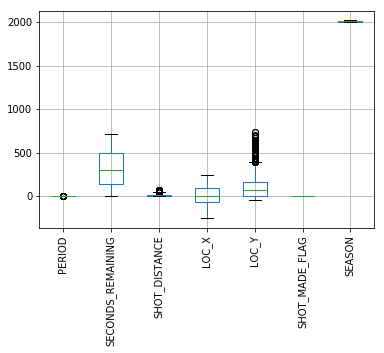

In [12]:
bp=df.boxplot(column=intcol[:], return_type="both")
plt.xticks(rotation=90)

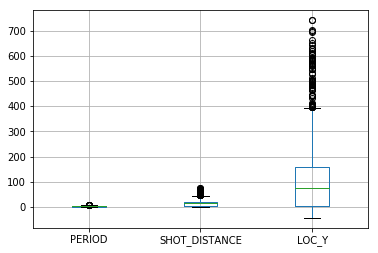

In [13]:
# Checking for columns with outliers
whiskers=[bp.lines["whiskers"][i:i+2] for i in range(0,len(bp.lines["whiskers"]),2)]
outliers=[]
for idx, i in enumerate(intcol[:]):
    if min(df[i])<whiskers[idx][0].get_ydata()[1] or max(df[i])>whiskers[idx][1].get_ydata()[1]: outliers.append(i)
outliers_bp=df.boxplot(column=outliers, return_type="both")

In [14]:
print(df.PERIOD.value_counts())
print(df[['SHOT_DISTANCE','LOC_Y']].describe())
# Outliers within reasonable range - explained by overtime and half court shots
# LOC_Y and SHOT_DISTANCE within reasonable range (84 ft court length)

3    7113
1    6915
4    6132
2    5710
5     283
6      38
7       7
Name: PERIOD, dtype: int64
       SHOT_DISTANCE         LOC_Y
count   26198.000000  26198.000000
mean       13.471105     91.065959
std         9.366627     87.550054
min         0.000000    -44.000000
25%         5.000000      4.000000
50%        15.000000     74.000000
75%        21.000000    160.000000
max        74.000000    741.000000


In [15]:
# we confirm that long distance shots are shot in the last seconds of a period
df[df.LOC_Y>=outliers_bp.lines["whiskers"][5].get_ydata()[1]][['SHOT_DISTANCE','SECONDS_REMAINING']]

,SHOT_DISTANCE,SECONDS_REMAINING
603,42,0
812,58,1
888,53,0
893,43,0
905,44,0
94,58,0
424,59,0
427,40,0
1147,48,0
177,47,0


In [16]:
df[df.SHOT_DISTANCE>=outliers_bp.lines["whiskers"][3].get_ydata()[1]][['SHOT_DISTANCE','SECONDS_REMAINING']]

,SHOT_DISTANCE,SECONDS_REMAINING
812,58,1
888,53,0
94,58,0
424,59,0
1147,48,0
177,47,0
322,48,0
397,45,0
585,62,0
1073,70,0


### Exploration

In [17]:
df.groupby('SHOT_MADE_FLAG').mean()

,PERIOD,SECONDS_REMAINING,THREE_POINT_SHOT,SHOT_DISTANCE,LOC_X,LOC_Y,SEASON,CLUTCH_SHOT,PULLUP,FINGERROLL,RUNNING,REVERSE,FOLLOWUP,SLAM,CUTTING,DRIVING,BANK,STEPBACK,PUTBACK,FLOATING,FADEAWAY,ALLEYOOP,TURNAROUND
SHOT_MADE_FLAG,,,,,,,,,,,,,,,,,,,,,,,
0,2.548443,315.335129,0.256819,15.181203,7.895725,102.999931,2006.672191,0.167254,0.009115,0.002900,0.015745,0.010427,0.000069,0.000552,0.000138,0.033906,0.007044,0.002831,0.000345,0.002279,0.037912,0.001865,0.038671
1,2.474183,326.268925,0.155757,11.357600,7.445080,76.316805,2006.449347,0.142272,0.026628,0.012119,0.058889,0.031237,0.001195,0.034992,0.000427,0.147990,0.028250,0.005718,0.001109,0.005633,0.065887,0.013143,0.070325


We notice significantly higher average for LOC_Y for shot made whereas LOC_X only shows little difference due to symmetry of the category. The positive number indicates a tendency to shoot from the right hand side.

In [18]:
def group_cat(cat):
    c=pd.DataFrame(df.groupby([cat,'SHOT_MADE_FLAG']).count().iloc[:,1].rename('COUNT'))
    return(pd.concat([df.groupby([cat,'SHOT_MADE_FLAG']).mean(), c], axis=1))

In [19]:
group_cat('BANK')

PERIOD  SECONDS_REMAINING  THREE_POINT_SHOT  \
BANK SHOT_MADE_FLAG                                                  
0    0               2.551221         315.231031          0.258432   
     1               2.474706         326.033199          0.159845   
1    0               2.156863         330.009804          0.029412   
     1               2.456193         334.377644          0.015106   

                     SHOT_DISTANCE      LOC_X       LOC_Y       SEASON  \
BANK SHOT_MADE_FLAG                                                      
0    0                   15.211698   8.284443  103.344043  2006.647959   
     1                   11.394432   8.671439   77.016512  2006.376778   
1    0                   10.882353 -46.901961   54.490196  2010.088235   
     1                   10.090634 -34.740181   52.247734  2008.945619   

                     CLUTCH_SHOT    PULLUP  FINGERROLL   RUNNING   REVERSE  \
BANK SHOT_MADE_FLAG                                                          
0    0                  0.167745  0.008832    0.002921  0.015161  0.010501   
     1                  0.143422  0.026875    0.012471  0.058581  0.032145   
1    0                  0.098039  0.049020    0.000000  0.098039  0.000000   
     1                  0.102719  0.018127    0.000000  0.069486  0.000000   

                     FOLLOWUP      SLAM   CUTTING   DRIVING  STEPBACK  \
BANK SHOT_MADE_FLAG                                                     
0    0                0.00007  0.000556  0.000139  0.034008  0.002851   
     1                0.00123  0.036009  0.000439  0.151941  0.005884   
1    0                0.00000  0.000000  0.000000  0.019608  0.000000   
     1                0.00000  0.000000  0.000000  0.012085  0.000000   

                      PUTBACK  FLOATING  FADEAWAY  ALLEYOOP  TURNAROUND  COUNT  
BANK SHOT_MADE_FLAG                                                             
0    0               0.000348  0.002295  0.037833  0.001878    0.037833  14379  
     1               0.001142  0.005709  0.065958  0.013525    0.067803  11386  
1    0               0.000000  0.000000  0.049020  0.000000    0.156863    102  
     1               0.000000  0.003021  0.063444  0.000000    0.157100    331

We observe that the made bank shots tend to come at a close to 45° angle from midrange as opposed to being aligned with the basket from high range.

In [20]:
group_cat('ACTION_TYPE')

PERIOD  SECONDS_REMAINING  THREE_POINT_SHOT  \
ACTION_TYPE SHOT_MADE_FLAG                                                  
Dunk Shot   0               2.649351         344.727273          0.000000   
            1               2.468391         316.360153          0.000000   
Hook Shot   0               2.310811         347.864865          0.000000   
            1               2.400000         317.715789          0.000000   
Jump Shot   0               2.553929         315.245073          0.304113   
            1               2.484641         329.743844          0.231658   
Layup Shot  0               2.519221         312.104343          0.000000   
            1               2.447637         321.305482          0.000000   
Tip Shot    0               2.561224         344.948980          0.000000   
            1               2.490909         270.090909          0.000000   

                            SHOT_DISTANCE      LOC_X       LOC_Y       SEASON  \
ACTION_TYPE SHOT_MADE_FLAG                                                      
Dunk Shot   0                    0.142857  -1.285714    1.350649  2003.766234   
            1                    0.163793   0.471264    1.313218  2004.558429   
Hook Shot   0                    5.945946  10.891892   40.324324  2007.689189   
            1                    5.421053   9.842105   40.368421  2008.389474   
Jump Shot   0                   17.862049   9.234116  121.143021  2006.866792   
            1                   16.671617  10.697639  111.873953  2006.820005   
Layup Shot  0                    0.467299   0.333000    3.425861  2005.720419   
            1                    0.392060   0.582231    2.861248  2006.066919   
Tip Shot    0                    0.173469   0.408163    1.367347  2003.357143   
            1                    0.272727  -0.163636    1.581818  2004.290909   

                            CLUTCH_SHOT    PULLUP  FINGERROLL   RUNNING  \
ACTION_TYPE SHOT_MADE_FLAG                                                
Dunk Shot   0                  0.142857  0.000000    0.000000  0.038961   
            1                  0.140805  0.000000    0.000000  0.015326   
Hook Shot   0                  0.121622  0.000000    0.000000  0.121622   
            1                  0.147368  0.000000    0.000000  0.284211   
Jump Shot   0                  0.169597  0.010794    0.000000  0.015292   
            1                  0.144072  0.039604    0.000000  0.074892   
Layup Shot  0                  0.158762  0.000000    0.020969  0.013979   
            1                  0.136484  0.000000    0.053686  0.021172   
Tip Shot    0                  0.102041  0.000000    0.000000  0.010204   
            1                  0.181818  0.000000    0.000000  0.018182   

                             REVERSE  FOLLOWUP      SLAM   CUTTING   DRIVING  \
ACTION_TYPE SHOT_MADE_FLAG                                                     
Dunk Shot   0               0.051948  0.012987  0.103896  0.000000  0.103896   
            1               0.073755  0.013410  0.392720  0.000000  0.288314   
Hook Shot   0               0.000000  0.000000  0.000000  0.000000  0.081081   
            1               0.000000  0.000000  0.000000  0.000000  0.073684   
Jump Shot   0               0.000000  0.000000  0.000000  0.000000  0.001472   
            1               0.000000  0.000000  0.000000  0.000000  0.001777   
Layup Shot  0               0.073390  0.000000  0.000000  0.000999  0.229156   
            1               0.109263  0.000000  0.000000  0.001890  0.533837   
Tip Shot    0               0.000000  0.000000  0.000000  0.000000  0.000000   
            1               0.000000  0.000000  0.000000  0.000000  0.000000   

                                BANK  STEPBACK   PUTBACK  FLOATING  FADEAWAY  \
ACTION_TYPE SHOT_MADE_FLAG                                                     
Dunk Shot   0               0.000000  0.000000  0.012987  0.000000  0.000000   
            1               0.

### Data visualisation and representation
** <span style="color:red"> Write explanations here</span> ** 
* Plotting shooting percentages over the career and under different conditions
* Plotting the shot distributions on the basketball court as well as a hexbin histogram
* Studying signficance of quantitative variables with variable to predict through boxplots
* Studying signficance of categorical variables with variable to predict through stacked barcharts
* Applying Goodness of Fit Test or Chi-squared Test to check significance between categorical variables and variable to predict

In [21]:
import seaborn as sns

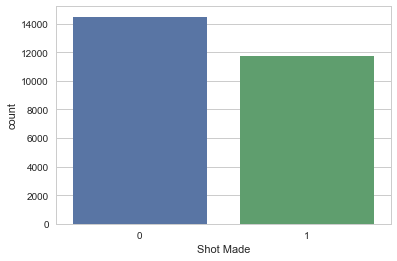

In [22]:
# CountPlot of Made Shots
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = "SHOT_MADE_FLAG", data = df)
plt.xlabel("Shot Made")
plt.show()

,Missed Shot,Made Shot,Total
Made,0,14481,14481
Missed,11717,0,11717
Total,11717,14481,26198


,Missed Shot,Made Shot
Made,6476.596572,8004.403428
Missed,5240.403428,6476.596572


p value of Chi Squared statistic for EVENT_TYPE: 0.0 with 1 Degrees of Freedom
EVENT_TYPE is significant to Made or Miss Shot


,Jump Shot,Layup Shot,Dunk Shot,Tip Shot,Hook Shot,Total
Made,77,74,12229,2003,98,14481
Missed,1044,95,7878,2645,55,11717
Total,1121,169,20107,4648,153,26198


,Jump Shot,Layup Shot,Dunk Shot,Tip Shot,Hook Shot
Made,619.635125,93.415108,11114.186846,2569.191847,84.571074
Missed,501.364875,75.584892,8992.813154,2078.808153,68.428926


p value of Chi Squared statistic for ACTION_TYPE: 0.0 with 4 Degrees of Freedom
ACTION_TYPE is significant to Made or Miss Shot


,Left_Side_Center,Center,Right_Side_Center,Right_Side,Left_Side,Back_Court,Total
Made,66,5340,1913,2227,2360,2575,14481
Missed,1,6056,1263,1248,1580,1569,11717
Total,67,11396,3176,3475,3940,4144,26198


,Left_Side_Center,Center,Right_Side_Center,Right_Side,Left_Side,Back_Court
Made,37.034392,6299.163142,1755.540728,1920.813612,2177.843347,2290.604779
Missed,29.965608,5096.836858,1420.459272,1554.186388,1762.156653,1853.395221


p value of Chi Squared statistic for SHOT_ZONE_AREA: 0.0 with 5 Degrees of Freedom
SHOT_ZONE_AREA is significant to Made or Miss Shot


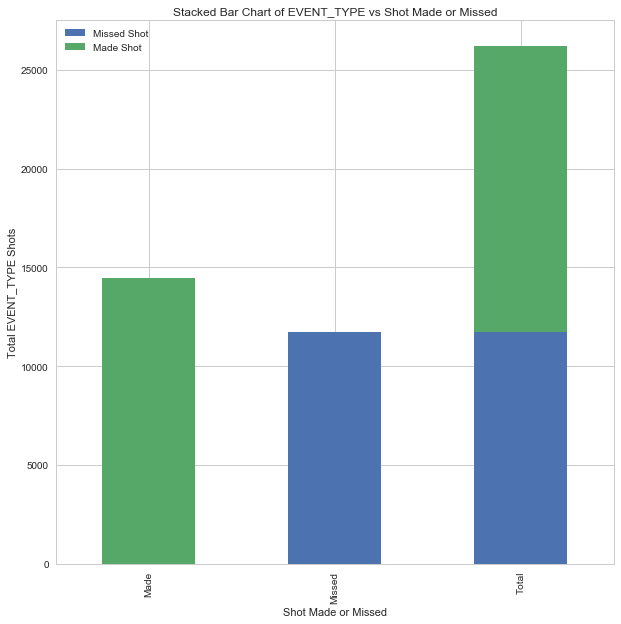

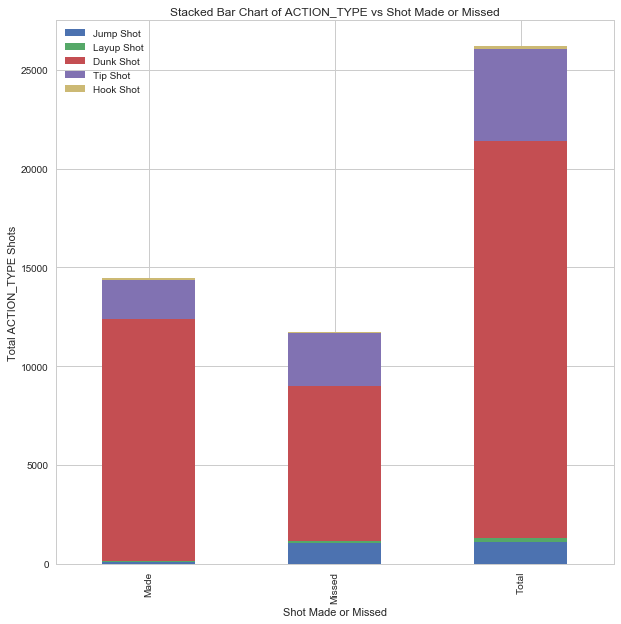

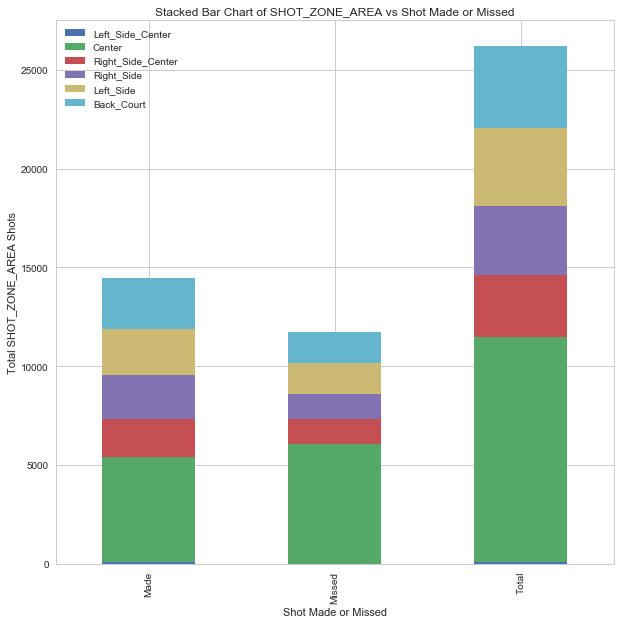

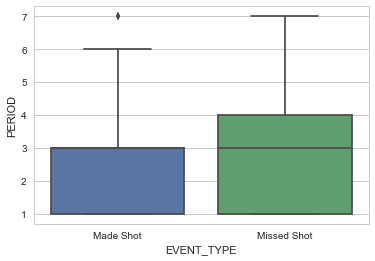

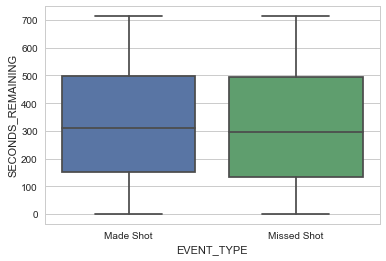

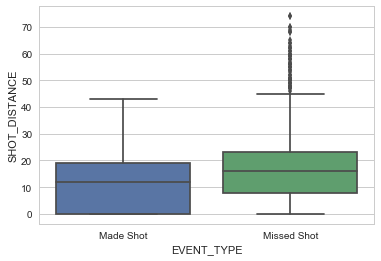

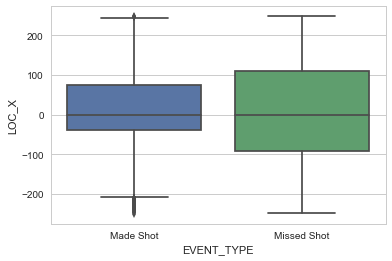

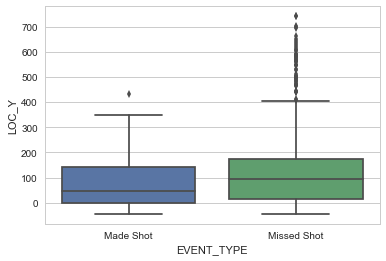

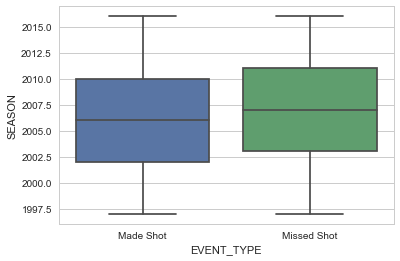

In [23]:
# This function detects quantitative and categorical variables in the dataframe
# Plots Boxplots for quantitative variable with variable to predict
# Plots Stacked Barcharts for categorical variables with variable to predict
# Plots Contingency tables for categorical variables
# Applies Chi-squared test for categorical variables and gets p value to check for significance

def quant_qual_plots(df):
    quant_variables = []
    qual_variables = []
    
    # Get Quant and Qual variables
    for idx, i in enumerate(df.columns):
        if df[i].dtype.name=="category":
            qual_variables.append(df.columns[idx])
        elif i!="GAME_DATE" and max(df[i])-min(df[i]) > 1:
            quant_variables.append(df.columns[idx])
    
    tabs = []
    # Barcharts for qual variables
    for idx, j in enumerate(qual_variables):
        if len(df[j].unique()) < 8:
            # Contingency Table
            tab = pd.crosstab(index = df["SHOT_MADE_FLAG"], columns=df[j], margins = True)
            
            # Observed and Expected Tables
            ## Observed
            columns = list(pd.unique(df[j]))
            columns.append("Total")
            tab.index = ["Made", "Missed", "Total"]
            tab.columns = columns
            observed = pd.DataFrame(tab.iloc[0:-1,0:-1])
            
            ## Expected
            total = tab.iloc[-1,-1]
            expected =  pd.DataFrame(np.outer(tab["Total"][0:-1], tab.iloc[-1][0:-1]) / total)
            expected.index = ["Made", "Missed"]
            columns.remove("Total")
            expected.columns = columns
            
            # Chi Square Test
            chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
            
            # Degrees of freedom
            dof = (len(list(pd.unique(df[j]))) - 1)*(len(list(pd.unique(df["SHOT_MADE_FLAG"]))) - 1)
            
            # p value 
            p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,df=dof)
                                                  
            display(tab)
            display(expected)
            print("p value of Chi Squared statistic for {}: {} with {} Degrees of Freedom".format(j, p_value, dof))
            if p_value < 0.05: 
                print("{} is significant to Made or Miss Shot".format(j))
            else:
                print("{} is NOT significant to Made or Miss Shot".format(j))
            plt.figure(idx)
            tabplot = tab.iloc[:,0:-1]
            tabplot.plot(kind="bar", 
                 figsize=(10, 10),
                 stacked=True)
            plt.title('Stacked Bar Chart of {} vs Shot Made or Missed'.format(j))
            plt.xlabel('Shot Made or Missed')
            plt.ylabel('Total {} Shots'.format(j))
        else:
            continue

    # Boxplots for quant variables
    for idx, j in enumerate(quant_variables):
        plt.figure(len(qual_variables) + 1 + idx)
        sns.boxplot(y=df[j], x=df["EVENT_TYPE"], data = df)
    
    return qual_variables, quant_variables


k = quant_qual_plots(df)

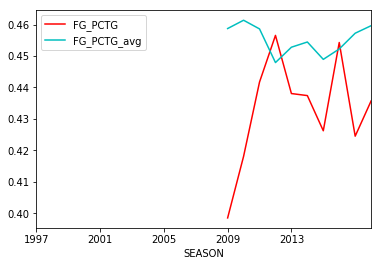

In [7]:
# Field Goal Percentage timeseries
tmp=df[['SEASON','SHOT_MADE_FLAG']].groupby('SEASON').agg(['sum','count'])
tmp.columns=tmp.columns.droplevel()
tmp.columns=['FGM','FGA']
tmp=tmp.reset_index()
tmp['FG_PCTG']=tmp.FGM.divide(tmp.FGA)
#league avg
tmpavg=avg[['FGA','FGM','SEASON']].groupby('SEASON').sum()
tmpavg=tmpavg.reset_index()
tmpavg['FG_PCTG_avg']=tmpavg.FGM.divide(tmpavg.FGA)
tmp=tmp.join(tmpavg[['SEASON','FG_PCTG_avg']].set_index('SEASON'), on='SEASON')
ax=tmp.plot(x='SEASON',y=['FG_PCTG','FG_PCTG_avg'],color=['r','c'])
_=ax.set_xticks(range(1997,2017,4))

In [25]:
def plot_pctg(col):
    tmp=df[[col,'SHOT_MADE_FLAG']].groupby(col).agg(['sum','count'])
    tmp.columns=tmp.columns.droplevel()
    tmp.columns=['FGM','FGA']
    
    tmp['FG_PCTG']=tmp.FGM.divide(tmp.FGA)
    tmp=tmp.sort_values('FG_PCTG',ascending=False)
    tmp=tmp.reset_index()
    ax=tmp.plot(x=col,y='FG_PCTG',color='#552583',kind='bar',figsize=(9,6))
    if col=='HTM': ax.get_children()[tmp.index[tmp['HTM']=='LAL'][0]].set_color('#FDB927')
    return(ax)

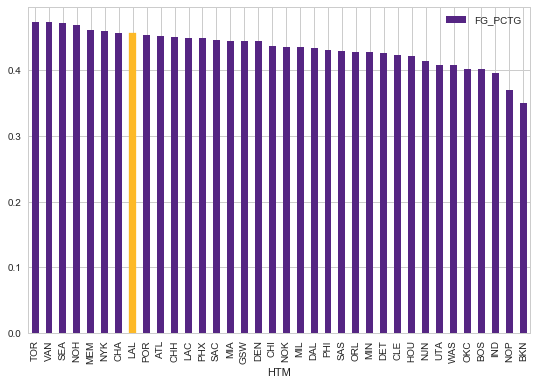

In [26]:
htm_plot=plot_pctg('HTM')

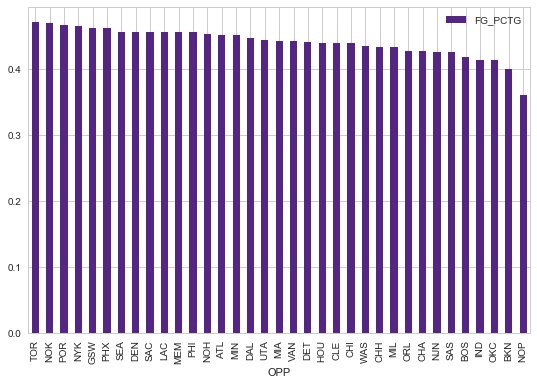

In [27]:
opp_plot=plot_pctg('OPP')

In [8]:
from matplotlib.patches import Circle, Rectangle, Arc

def add_patches(p):
    ax=plt.gca()
    for i in p:
        ax.add_patch(i)

In [9]:
def plot_shotchart(sc,hb=False):
    fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(8, 12))
    plt.xlim(-250,250)
    plt.ylim(-47.5,702.5)
    
    c = 'white' if hb else 'black'
    
    patches = [Rectangle((-250, -47.5), 500, 0, linewidth=2, color=c),
    Rectangle((-250, -47.5), 0, 940, linewidth=2, color=c),
    Rectangle((250, -47.5), 0, 940, linewidth=2, color=c),
    Rectangle((-250, 422.5), 500, 0, linewidth=2, color=c),
    Rectangle((-220, -47.5), 0, 140, linewidth=2, color=c),
    Rectangle((220, -47.5), 0, 140, linewidth=2, color=c),
    Rectangle((-30, -7.5), 60, 0, linewidth=4, color=c),
    Rectangle((-60, 142.5), 120, 0, linewidth=2, color=c),
    Rectangle((-60, -47.5), 120, 190, linewidth=2, color=c, fill=False),
    Rectangle((-80, -47.5), 160, 190, linewidth=2, color=c, fill=False),
    Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=2, color=c),
    Circle((0, 0), 7.5, linewidth=2, color=c, fill=False),
    Circle((0, 142.5), 60, linewidth=2, color=c, fill=False)]

    add_patches(patches)
    colors,labs=["#f75036", "#37f275"],["FG Missed", "FG Made"]
    
    if(not hb):
        for i in [0,1]:
            fg=sc[sc.SHOT_MADE_FLAG==i][["LOC_X","LOC_Y"]]
            plt.scatter(-fg.LOC_X, fg.LOC_Y, s=2, c=colors[i], label=labs[i])
        plt.legend()
    else:
        hb = ax.hexbin(sc.LOC_X, sc.LOC_Y, cmap="inferno", gridsize=72, norm=matplotlib.colors.LogNorm())
        cb = fig.colorbar(hb, ax=ax)

    plt.show()

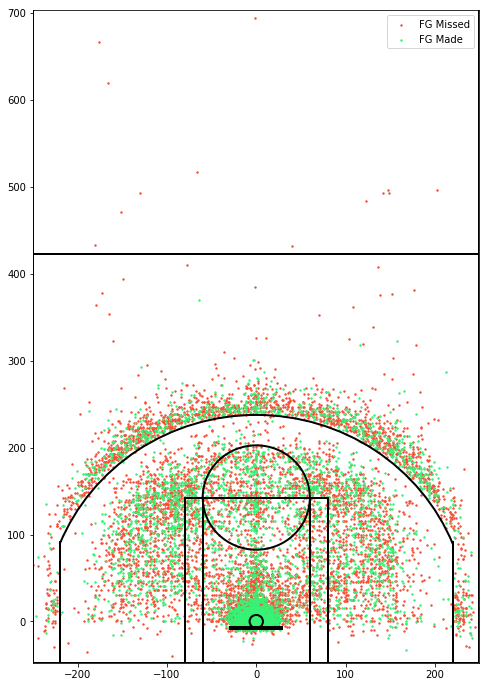

In [10]:
plot_shotchart(df,False)

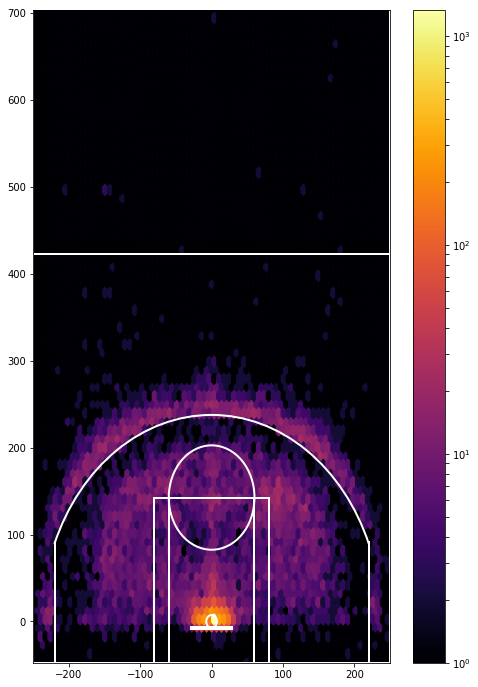

In [11]:
plot_shotchart(df,True)

### Estimation question
** <span style="color:red"> Write explanations here</span> ** 
* Designing Logistic Regression Model to predict if Kobe will make the shot or won't
* Cleaning Data to better fit model
* Implementing the model
* Fitting the model
* Checking Accuracy of model
* Cross Validation using K-Fold
* Plotting ROC Curve

In [39]:
dfm=df.copy()
dfm=dfm.drop(['GAME_DATE','EVENT_TYPE'],axis=1)

In [40]:
import statsmodels.api as sm

In [41]:
def split_categorical(d, cat):
    d=pd.concat([d,pd.get_dummies(d[cat])],axis=1)
    return(d.drop(cat,axis=1))
dfm=split_categorical(dfm,['ACTION_TYPE','SHOT_ZONE_AREA','HTM','OPP'])
dfm

,PERIOD,SECONDS_REMAINING,THREE_POINT_SHOT,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SEASON,CLUTCH_SHOT,PULLUP,FINGERROLL,RUNNING,REVERSE,FOLLOWUP,SLAM,CUTTING,DRIVING,BANK,STEPBACK,PUTBACK,FLOATING,FADEAWAY,ALLEYOOP,TURNAROUND,ACTION_TYPE_Dunk Shot,ACTION_TYPE_Hook Shot,ACTION_TYPE_Jump Shot,ACTION_TYPE_Layup Shot,ACTION_TYPE_Tip Shot,SHOT_ZONE_AREA_Back_Court,SHOT_ZONE_AREA_Center,SHOT_ZONE_AREA_Left_Side,SHOT_ZONE_AREA_Left_Side_Center,SHOT_ZONE_AREA_Right_Side,SHOT_ZONE_AREA_Right_Side_Center,HTM_ATL,HTM_BKN,HTM_BOS,HTM_CHA,HTM_CHH,HTM_CHI,HTM_CLE,HTM_DAL,HTM_DEN,HTM_DET,HTM_GSW,HTM_HOU,HTM_IND,HTM_LAC,HTM_LAL,HTM_MEM,HTM_MIA,HTM_MIL,HTM_MIN,HTM_NJN,HTM_NOH,HTM_NOK,HTM_NOP,HTM_NYK,HTM_OKC,HTM_ORL,HTM_PHI,HTM_PHX,HTM_POR,HTM_SAC,HTM_SAS,HTM_SEA,HTM_TOR,HTM_UTA,HTM_VAN,HTM_WAS,OPP_ATL,OPP_BKN,OPP_BOS,OPP_CHA,OPP_CHH,OPP_CHI,OPP_CLE,OPP_DAL,OPP_DEN,OPP_DET,OPP_GSW,OPP_HOU,OPP_IND,OPP_LAC,OPP_MEM,OPP_MIA,OPP_MIL,OPP_MIN,OPP_NJN,OPP_NOH,OPP_NOK,OPP_NOP,OPP_NYK,OPP_OKC,OPP_ORL,OPP_PHI,OPP_PHX,OPP_POR,OPP_SAC,OPP_SAS,OPP_SEA,OPP_TOR,OPP_UTA,OPP_VAN,OPP_WAS
0,1,42,0,18,-140,116,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,608,0,16,-131,97,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,517,1,23,-142,181,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,394,1,0,0,0,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,327,0,13,-10,138,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,438,0,19,75,177,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,2,136,1,23,-64,223,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,3,205,0,0,0,0,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,3,113,0,19,-79,177,0,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,3,74,1,23,-103,207,1,1997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
# Training, testing
from sklearn import model_selection
ttsplit=sklearn.model_selection.train_test_split(dfm,train_size=0.9,test_size=0.1)
train_data=ttsplit[0]
test_data=ttsplit[1]
print (type(train_data), type(test_data))
#dfm=dfm.reset_index().drop('index', axis=1)
#test_data=dfm.sample(frac=0.1)
#train_data=dfm.drop(test_data.index)
#print(train_data.shape, test_data.shape)

train_data.describe()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


,PERIOD,SECONDS_REMAINING,THREE_POINT_SHOT,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SEASON,CLUTCH_SHOT,PULLUP,FINGERROLL,RUNNING,REVERSE,FOLLOWUP,SLAM,CUTTING,DRIVING,BANK,STEPBACK,PUTBACK,FLOATING,FADEAWAY,ALLEYOOP,TURNAROUND,ACTION_TYPE_Dunk Shot,ACTION_TYPE_Hook Shot,ACTION_TYPE_Jump Shot,ACTION_TYPE_Layup Shot,ACTION_TYPE_Tip Shot,SHOT_ZONE_AREA_Back_Court,SHOT_ZONE_AREA_Center,SHOT_ZONE_AREA_Left_Side,SHOT_ZONE_AREA_Left_Side_Center,SHOT_ZONE_AREA_Right_Side,SHOT_ZONE_AREA_Right_Side_Center,HTM_ATL,HTM_BKN,HTM_BOS,HTM_CHA,HTM_CHH,HTM_CHI,HTM_CLE,HTM_DAL,HTM_DEN,HTM_DET,HTM_GSW,HTM_HOU,HTM_IND,HTM_LAC,HTM_LAL,HTM_MEM,HTM_MIA,HTM_MIL,HTM_MIN,HTM_NJN,HTM_NOH,HTM_NOK,HTM_NOP,HTM_NYK,HTM_OKC,HTM_ORL,HTM_PHI,HTM_PHX,HTM_POR,HTM_SAC,HTM_SAS,HTM_SEA,HTM_TOR,HTM_UTA,HTM_VAN,HTM_WAS,OPP_ATL,OPP_BKN,OPP_BOS,OPP_CHA,OPP_CHH,OPP_CHI,OPP_CLE,OPP_DAL,OPP_DEN,OPP_DET,OPP_GSW,OPP_HOU,OPP_IND,OPP_LAC,OPP_MEM,OPP_MIA,OPP_MIL,OPP_MIN,OPP_NJN,OPP_NOH,OPP_NOK,OPP_NOP,OPP_NYK,OPP_OKC,OPP_ORL,OPP_PHI,OPP_PHX,OPP_POR,OPP_SAC,OPP_SAS,OPP_SEA,OPP_TOR,OPP_UTA,OPP_VAN,OPP_WAS
count,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.00000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000,23578.000000
mean,2.512257,320.404996,0.210154,13.448511,7.524090,90.854186,0.446603,2006.555560,0.154763,0.016965,0.007040,0.034948,0.019849,0.000594,0.015565,0.000297,0.085631,0.016583,0.003987,0.000721,0.003817,0.050471,0.006447,0.052931,0.042540,0.006489,0.767919,0.177029,0.006023,0.002502,0.435788,0.121936,0.132539,0.150734,0.156502,0.011621,0.001484,0.014208,0.008440,0.002630,0.011833,0.012427,0.022394,0.026508,0.011833,0.025829,0.024133,0.011239,0.023539,0.488633,0.019255,0.011367,0.010900,0.023624,0.009119,0.009416,0.004326,0.003011,0.012681,0.006913,0.012724,0.012851,0.024005,0.025235,0.025660,0.025151,0.016202,0.012724,0.020909,0.00492,0.012257,0.020019,0.001993,0.024896,0.017219,0.006659,0.023454,0.023878,0.042752,0.047205,0.023157,0.051107,0.051107,0.025108,0.048308,0.039019,0.023836,0.022479,0.046017,0.017219,0.020655,0.006701,0.003987,0.025151,0.016414,0.022267,0.023539,0.048774,0.048520,0.048053,0.048986,0.031131,0.025532,0.042837,0.009288,0.022733
std,1.153469,207.551881,0.407426,9.342452,110.527061,87.359032,0.497151,4.951115,0.361686,0.129143,0.083613,0.183652,0.139484,0.024361,0.123789,0.017228,0.279824,0.127706,0.063016,0.026843,0.061666,0.218919,0.080034,0.223900,0.201821,0.080295,0.422169,0.381702,0.077373,0.049962,0.495870,0.327218,0.339083,0.357797,0.363338,0.107175,0.038501,0.118351,0.091483,0.051213,0.108137,0.110783,0.147964,0.160643,0.108137,0.158629,0.153464,0.105420,0.151611,0.499881,0.137424,0.106009,0.103835,0.151877,0.095057,0.096578,0.065632,0.054794,0.111897,0.082860,0.112082,0.112634,0.153069,0.15684

In [52]:
y_train = train_data.SHOT_MADE_FLAG
X_train = train_data.drop('SHOT_MADE_FLAG',axis=1)
y_test = test_data.SHOT_MADE_FLAG
X_test = test_data.drop('SHOT_MADE_FLAG',axis=1)

logit = sm.Logit(y_train, X_train)
log_res = logit.fit()

print(log_res.summary())

Optimization terminated successfully.
         Current function value: 0.609103
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         SHOT_MADE_FLAG   No. Observations:                23578
Model:                          Logit   Df Residuals:                    23476
Method:                           MLE   Df Model:                          101
Date:                Sun, 14 Jan 2018   Pseudo R-squ.:                  0.1139
Time:                        15:34:17   Log-Likelihood:                -14361.
converged:                       True   LL-Null:                       -16208.
                                        LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
PERIOD                              -0.0388      0.015     -2.50

C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\dwan0\Documents\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [61]:
np.diag(log_res.cov_params())

array([  2.39739965e-04,   5.47386736e-09,   3.11202345e-03,
         3.27777052e-05,   1.45022519e-07,   1.84469031e-07,
         1.02661948e-05,   2.75106569e-03,   1.31854437e-02,
         3.83399130e-02,   7.56853506e-03,   1.32612938e-02,
         1.10151814e+00,   1.49378723e-01,   7.44538613e-01,
         4.84692289e-03,   1.63198962e-02,   4.54968623e-02,
         3.37659203e-01,   5.18220873e-02,   4.41733173e-03,
         6.54530102e-02,   4.21041704e-03,   2.05623726e+12,
         2.30699257e+12,   1.97680680e+12,   2.19853352e+12,
         2.21916181e+12,   9.94681113e+11,   2.84194604e+11,
         9.36170460e+11,   1.07826776e+12,   5.93465202e+11,
         5.18237219e+11,  -1.45536671e+12,  -1.45499654e+12,
        -1.45655126e+12,  -1.45721757e+12,  -1.45484847e+12,
        -1.45507057e+12,  -1.45655126e+12,  -1.45766177e+12,
        -1.45507057e+12,  -1.45388602e+12,  -1.45551478e+12,
        -1.45655126e+12,  -1.45625512e+12,  -1.45521864e+12,
        -1.45573688e+12,

In [53]:
y_pred = log_res.predict(X_test)
pred_ct=pd.DataFrame(test_data['SHOT_MADE_FLAG']).join(y_pred.rename('pred')).reset_index().drop('index',axis=1)
pred_ct['pred']=np.where(pred_ct.pred>0.5,1,0)
pred_ct

,SHOT_MADE_FLAG,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,1,0
9,1,0


In [54]:
ct=pd.crosstab(index=pred_ct['SHOT_MADE_FLAG'],columns=pred_ct['pred'])
print('Accuracy: ', (ct.loc[0,0]+ct.loc[1,1])/ct.sum().sum())
TP,TN,FP,FN = ct

Accuracy:  0.579858982219


pred,0,1
SHOT_MADE_FLAG,,
0,2776,765
1,1976,1007


In [83]:
ct

pred,0,1
SHOT_MADE_FLAG,,
0,2751,790
1,1950,1033


Accuracy: 0.58
TPR = Sensitivity: 0.35
FPR = 1 - Specificity(0.78): 0.22


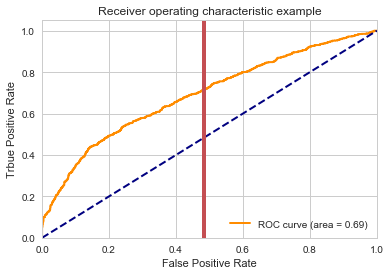

In [55]:
from sklearn import metrics

fpr, tpr, threshold = sklearn.metrics.roc_curve(y_true=y_test,y_score=y_pred)
roc_auc=sklearn.metrics.auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.axvline(x=threshold[np.argmax(tpr - fpr)],linewidth=4,color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('Trbue Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
pred_ct=pd.DataFrame(test_data['SHOT_MADE_FLAG']).join(y_pred.rename('pred')).reset_index().drop('index',axis=1)
pred_ct['pred']=np.where(pred_ct.pred>threshold[np.argmax(tpr - fpr)],1,0)

ct=pd.crosstab(index=pred_ct['SHOT_MADE_FLAG'],columns=pred_ct['pred'])
print('Accuracy: ', (ct.loc[0,0]+ct.loc[1,1])/ct.sum().sum())
ct

Accuracy:  0.580012262416


pred,0,1
SHOT_MADE_FLAG,,
0,2751,790
1,1950,1033


In [57]:
import sklearn.linear_model as sklin
import sklearn.cross_validation as skcros
import sklearn.model_selection as skmod
import sklearn.metrics as skmet

In [58]:
# Logistic Regression
logreg = sklin.LogisticRegression()
logreg.fit(X_train, y_train)

#Predict
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [59]:
# K Fold Cross Validation
kfold = skmod.KFold(n_splits=10, random_state=7)
modelCV = logreg
scoring = 'accuracy'
results = skmod.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

# Confusion Matrix
confusionmatrix = skmet.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

print(skmet.classification_report(y_test, y_pred))

10-fold cross validation average accuracy: 0.679
[[1234  199]
 [ 696  491]]
             precision    recall  f1-score   support

          0       0.64      0.86      0.73      1433
          1       0.71      0.41      0.52      1187

avg / total       0.67      0.66      0.64      2620

